In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ribeira grande pt
emerald au
batemans bay au
tashtyp ru
kaitangata nz
castro cl
jamestown sh
amderma ru
sale au
palmer us
qaanaaq gl
sao joao da barra br
castro cl
hobart au
khatanga ru
ushuaia ar
bethel us
taolanaro mg
iqaluit ca
clyde river ca
paamiut gl
chuy uy
thompson ca
champerico gt
bunia cd
tsihombe mg
clyde river ca
port alfred za
butaritari ki
kadykchan ru
college us
albany au
mataura pf
angoche mz
ulaangom mn
naushki ru
faanui pf
kukuna sl
punta arenas cl
lydenburg za
kegayli uz
hilo us
rikitea pf
esperance au
puerto ayora ec
punta arenas cl
puerto ayora ec
bereda so
culebra us
cockburn town bs
mar del plata ar
bluff nz
punta arenas cl
nizhneyansk ru
cabo san lucas mx
crotone it
mataura pf
kannur in
abu samrah qa
port elizabeth za
smidovich ru
xuanzhou cn
busselton au
taolanaro mg
sorland no
sitka us
lipari it
attawapiskat ca
bilibino ru
ketchikan us
paamiut gl
thompson ca
hambantota lk
busselton au
taolanaro mg
barentsburg sj
grindavik is
lata sb
albany au
barahona do
saint

mar del plata ar
lata sb
qaqortoq gl
rikitea pf
port alfred za
jamestown sh
rikitea pf
port hardy ca
new norfolk au
mataura pf
atuona pf
hobart au
norman wells ca
chara ru
atuona pf
geraldton au
punta arenas cl
albany au
saint peter us
mahebourg mu
walvis bay na
busselton au
qasigiannguit gl
potsdam us
karamea nz
roma au
severnyy ru
vorukh tj
makasar id
punta arenas cl
lamu ke
noumea nc
ushuaia ar
illoqqortoormiut gl
jamestown sh
ushuaia ar
mingguang cn
ushuaia ar
lubao cd
atuona pf
mataura pf
sibu my
narodychi ua
faya td
jamestown sh
busselton au
caravelas br
carnarvon au
mar del plata ar
vicuna cl
bluff nz
albany au
punta arenas cl
olafsvik is
sorland no
severo-kurilsk ru
ouegoa nc
port alfred za
rikitea pf
dikson ru
tuktoyaktuk ca
katsuura jp
rikitea pf
nikolskoye ru
tura ru
bluff nz
puerto lempira hn
punta arenas cl
severo-kurilsk ru
garissa ke
higuey do
cidreira br
cape town za
kapaa us
vaini to
puerto ayora ec
barentsburg sj
illoqqortoormiut gl
vaini to
fevralsk ru
harjavalta fi


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

583

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6f59eec25bba9edc384930e852bc222b


In [14]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [22]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 34 of Set 23 | ribeira grande
Processing Record 35 of Set 23 | emerald
Processing Record 36 of Set 23 | batemans bay
Processing Record 37 of Set 23 | tashtyp
Processing Record 38 of Set 23 | kaitangata
Processing Record 39 of Set 23 | castro
Processing Record 40 of Set 23 | jamestown
Processing Record 41 of Set 23 | amderma
City not found. Skipping...
Processing Record 42 of Set 23 | sale
Processing Record 43 of Set 23 | palmer
Processing Record 44 of Set 23 | qaanaaq
Processing Record 45 of Set 23 | sao joao da barra
Processing Record 46 of Set 23 | hobart
Processing Record 47 of Set 23 | khatanga
Processing Record 48 of Set 23 | ushuaia
Processing Record 49 of Set 23 | bethel
Processing Record 50 of Set 23 | taolanaro
City not found. Skipping...
Processing Record 51 of Set 23 | iqaluit
Processing Record 52 of Set 23 | clyde river
Processing Record 53 of Set 23 | paamiut
Processing Record 54 of Set 23 | chuy
Processing Record 55 of Set 23 | thompson
Processing Record

Processing Record 32 of Set 26 | suntar
Processing Record 33 of Set 26 | cherskiy
Processing Record 34 of Set 26 | yaan
Processing Record 35 of Set 26 | saleaula
City not found. Skipping...
Processing Record 36 of Set 26 | caconda
Processing Record 37 of Set 26 | mareeba
Processing Record 38 of Set 26 | pisco
Processing Record 39 of Set 26 | strezhevoy
Processing Record 40 of Set 26 | cam ranh
Processing Record 41 of Set 26 | jiaozuo
Processing Record 42 of Set 26 | mesyagutovo
Processing Record 43 of Set 26 | leningradskiy
Processing Record 44 of Set 26 | nishihara
Processing Record 45 of Set 26 | esmeralda
Processing Record 46 of Set 26 | chapaevsk
Processing Record 47 of Set 26 | klaksvik
Processing Record 48 of Set 26 | gamba
Processing Record 49 of Set 26 | pevek
Processing Record 50 of Set 26 | terney
Processing Record 1 of Set 27 | iranshahr
Processing Record 2 of Set 27 | saint-paul
Processing Record 3 of Set 27 | kruisfontein
Processing Record 4 of Set 27 | duz
City not found.

Processing Record 15 of Set 30 | itaueira
Processing Record 16 of Set 30 | port-gentil
Processing Record 17 of Set 30 | progreso
Processing Record 18 of Set 30 | tumannyy
City not found. Skipping...
Processing Record 19 of Set 30 | ilulissat
Processing Record 20 of Set 30 | marrakesh
Processing Record 21 of Set 30 | ust-kuyga
Processing Record 22 of Set 30 | azimur
City not found. Skipping...
Processing Record 23 of Set 30 | qaqortoq
Processing Record 24 of Set 30 | saint peter
Processing Record 25 of Set 30 | qasigiannguit
Processing Record 26 of Set 30 | potsdam
Processing Record 27 of Set 30 | karamea
City not found. Skipping...
Processing Record 28 of Set 30 | roma
Processing Record 29 of Set 30 | severnyy
Processing Record 30 of Set 30 | vorukh
Processing Record 31 of Set 30 | makasar
Processing Record 32 of Set 30 | lamu
Processing Record 33 of Set 30 | noumea
Processing Record 34 of Set 30 | mingguang
Processing Record 35 of Set 30 | lubao
Processing Record 36 of Set 30 | sibu
P

Processing Record 47 of Set 33 | sur
Processing Record 48 of Set 33 | khovu-aksy
Processing Record 49 of Set 33 | fairbanks
Processing Record 50 of Set 33 | bontang
Processing Record 1 of Set 34 | avenal
Processing Record 2 of Set 34 | muli
Processing Record 3 of Set 34 | ames
Processing Record 4 of Set 34 | valer
Processing Record 5 of Set 34 | canatlan
Processing Record 6 of Set 34 | kurilsk
Processing Record 7 of Set 34 | bathsheba
Processing Record 8 of Set 34 | orsha
Processing Record 9 of Set 34 | westpunt
City not found. Skipping...
Processing Record 10 of Set 34 | polewali
Processing Record 11 of Set 34 | icod de los vinos
Processing Record 12 of Set 34 | buala
Processing Record 13 of Set 34 | bowen
Processing Record 14 of Set 34 | kihei
Processing Record 15 of Set 34 | varna
Processing Record 16 of Set 34 | balkanabat
Processing Record 17 of Set 34 | togur
Processing Record 18 of Set 34 | vanderhoof
Processing Record 19 of Set 34 | diu
Processing Record 20 of Set 34 | povenets

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,69.78,73,10,3.60,PT,2021-09-15 04:34:58
1,Emerald,-23.5333,148.1667,78.94,14,5,9.22,AU,2021-09-15 04:34:59
2,Batemans Bay,-35.7167,150.1833,66.20,58,72,9.46,AU,2021-09-15 04:34:59
3,Tashtyp,52.7939,89.8983,56.53,52,100,6.82,RU,2021-09-15 04:34:59
4,Kaitangata,-46.2817,169.8464,50.83,59,24,7.52,NZ,2021-09-15 04:34:59
5,Castro,-24.7911,-50.0119,62.06,99,85,3.09,BR,2021-09-15 04:32:17
6,Jamestown,42.0970,-79.2353,74.71,83,1,12.66,US,2021-09-15 04:30:18
7,Sale,34.0389,-6.8166,69.75,94,14,5.75,MA,2021-09-15 04:35:00
8,Palmer,42.1584,-72.3287,67.86,78,90,3.00,US,2021-09-15 04:34:06
9,Qaanaaq,77.4840,-69.3632,15.26,90,64,6.49,GL,2021-09-15 04:35:00


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1631680975.9596052

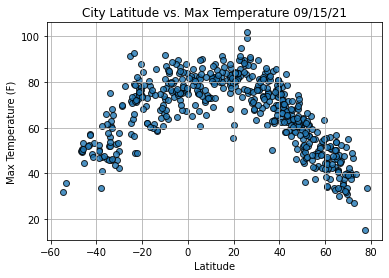

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

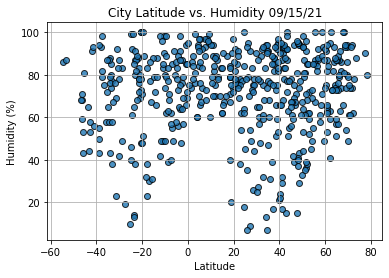

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

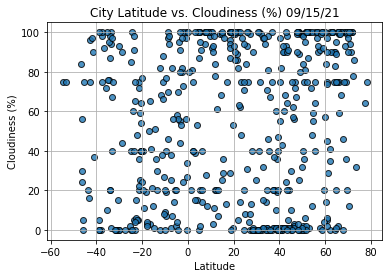

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

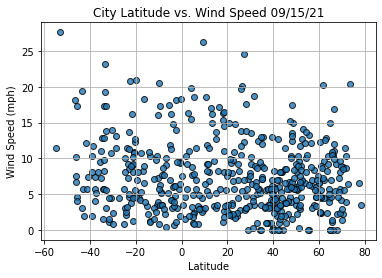

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

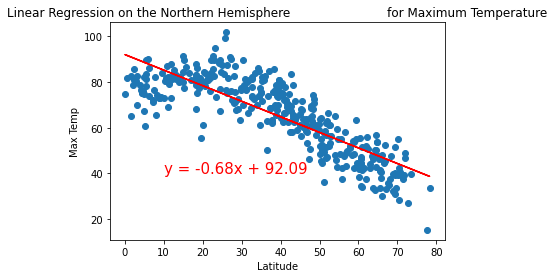

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

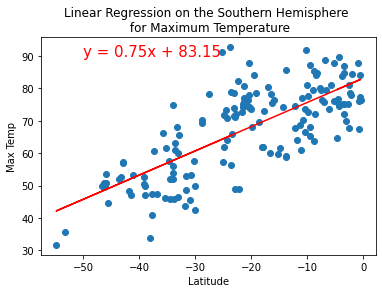

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

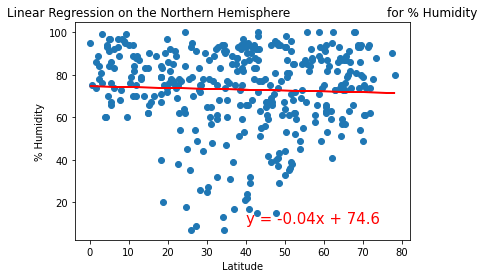

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

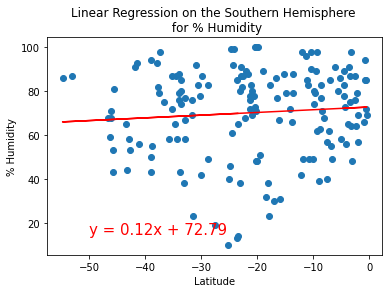

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

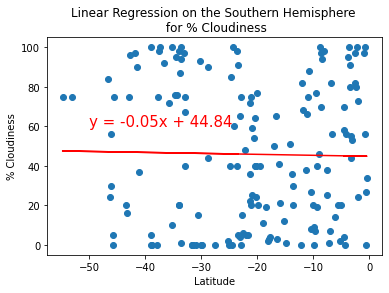

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

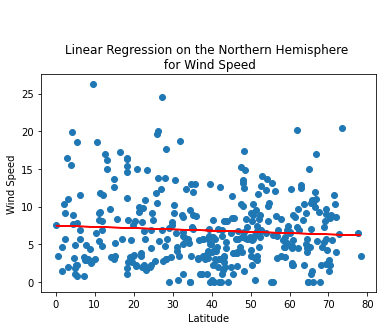

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

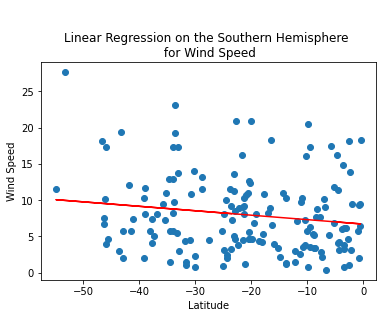

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))